In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('evaluacion_ingresos.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Eliminemos las columnas innecesarias


In [ ]:
df.drop(columns=' fnlwgt',inplace=True)

In [ ]:
df.columns

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' native-country', ' income'],
      dtype='object')

### Renombramos los nombres de las columnas


In [ ]:
col_names = ['Edad', 'Clase_Trabajo', 'Educacion', 'Numero_Educacion', 'Estado_civil', 'Ocupacion', 'Relacion',
             'Raza', 'Sexo', 'Ganancia_capital', 'Perdida_capital', 'Horas_por_semana', 'Pais_origen', 'Ingresos']

df.columns = col_names

df.columns

Index(['Edad', 'Clase_Trabajo', 'Educacion', 'Numero_Educacion',
       'Estado_civil', 'Ocupacion', 'Relacion', 'Raza', 'Sexo',
       'Ganancia_capital', 'Perdida_capital', 'Horas_por_semana',
       'Pais_origen', 'Ingresos'],
      dtype='object')

In [ ]:
#Identificamos valores nulos
df.isnull().sum()

Edad                0
Clase_Trabajo       0
Educacion           0
Numero_Educacion    0
Estado_civil        0
Ocupacion           0
Relacion            0
Raza                0
Sexo                0
Ganancia_capital    0
Perdida_capital     0
Horas_por_semana    0
Pais_origen         0
Ingresos            0
Grupo_edad          0
Ingresos_bin        0
dtype: int64

# Procesamiento de datos



#### Agregar nuevas columnas

Para poder analizar los datos a futuro agregamos nuevas columnas , en caso de Grupo_edad para analizar patrones en diferentes grupos de edad y en Ingresos_bin preparar datos para modelos de clasificación binaria, donde se desea predecir si los ingresos son superiores a cierto umbral

In [ ]:
# agregando nuevas columnas
bins = [16, 24, 64, 90]
labels = ["young","adult","old"]
df['Grupo_edad'] = pd.cut(df['Edad'], bins=bins, labels=labels)
df['Ingresos_bin'] = np.where(df['Ingresos'] == ' >50K', 1, 0).astype('int16')

In [ ]:
df.head()

,Edad,Clase_Trabajo,Educacion,Numero_Educacion,Estado_civil,Ocupacion,Relacion,Raza,Sexo,Ganancia_capital,Perdida_capital,Horas_por_semana,Pais_origen,Ingresos,Grupo_edad,Ingresos_bin
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


### Eliminamos los espacios de las columnas con la funcion strip()


In [ ]:
np.unique(df.Educacion)

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [ ]:
df.columns

Index(['Edad', 'Clase_Trabajo', 'Educacion', 'Numero_Educacion',
       'Estado_civil', 'Ocupacion', 'Relacion', 'Raza', 'Sexo',
       'Ganancia_capital', 'Perdida_capital', 'Horas_por_semana',
       'Pais_origen', 'Ingresos', 'Grupo_edad', 'Ingresos_bin'],
      dtype='object')

In [ ]:
strip_columns = ['Clase_Trabajo', 'Educacion','Estado_civil',
       'Ocupacion', 'Relacion', 'Raza', 'Sexo','Pais_origen', 'Ingresos']

In [ ]:
for i in strip_columns:
    df[i] = df[i].str.strip()

In [ ]:
np.unique(df.Clase_Trabajo)

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

### Encontramos valores categoricos y valores numericos





In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Hay {} variables categoricas\n'.format(len(categorical)))

print('Las variables categoricas son :\n\n', categorical)

Hay 9 variables categoricas

Las variables categoricas son :

 ['Clase_Trabajo', 'Educacion', 'Estado_civil', 'Ocupacion', 'Relacion', 'Raza', 'Sexo', 'Pais_origen', 'Ingresos']


In [ ]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='int64']

print('Hay {} variables numericas\n'.format(len(numerical)))

print('Las variables numericas son :\n\n', numerical)

Hay 5 variables numericas

Las variables numericas son :

 ['Edad', 'Numero_Educacion', 'Ganancia_capital', 'Perdida_capital', 'Horas_por_semana']


In [ ]:
for var in categorical:

    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Clase_Trabajo, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Educacion, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Estado_civil, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3

Al observar todas las columnas , podemos ver que hay columnas con valores faltantes



In [ ]:
df.loc[df['Clase_Trabajo']=='?']

,Edad,Clase_Trabajo,Educacion,Numero_Educacion,Estado_civil,Ocupacion,Relacion,Raza,Sexo,Ganancia_capital,Perdida_capital,Horas_por_semana,Pais_origen,Ingresos,Grupo_edad,Ingresos_bin
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,adult,1
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,adult,0
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,adult,0
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,old,0
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,adult,1
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,adult,0
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,old,1
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,adult,0


A continuacion remplazamos el valor '?' por el valor 'Nan'

In [ ]:
df.loc[df['Clase_Trabajo']=='?', 'Clase_Trabajo']= np.NaN


df.loc[df['Ocupacion']=='?', 'Ocupacion']= np.NaN


df.loc[df['Pais_origen']=='?', 'Pais_origen']= np.NaN

In [ ]:
df.Clase_Trabajo.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Clase_Trabajo, dtype: int64

In [ ]:
df.isnull().sum()

Edad                   0
Clase_Trabajo       1836
Educacion              0
Numero_Educacion       0
Estado_civil           0
Ocupacion           1843
Relacion               0
Raza                   0
Sexo                   0
Ganancia_capital       0
Perdida_capital        0
Horas_por_semana       0
Pais_origen          583
Ingresos               0
Grupo_edad             0
Ingresos_bin           0
dtype: int64

# Visualizacion de datos

In [ ]:
df.head()

,Edad,Clase_Trabajo,Educacion,Numero_Educacion,Estado_civil,Ocupacion,Relacion,Raza,Sexo,Ganancia_capital,Perdida_capital,Horas_por_semana,Pais_origen,Ingresos,Grupo_edad,Ingresos_bin
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


Determinamos nuestra variable objetivo que es el 'Ingreso' y la visualizamos en un grafico

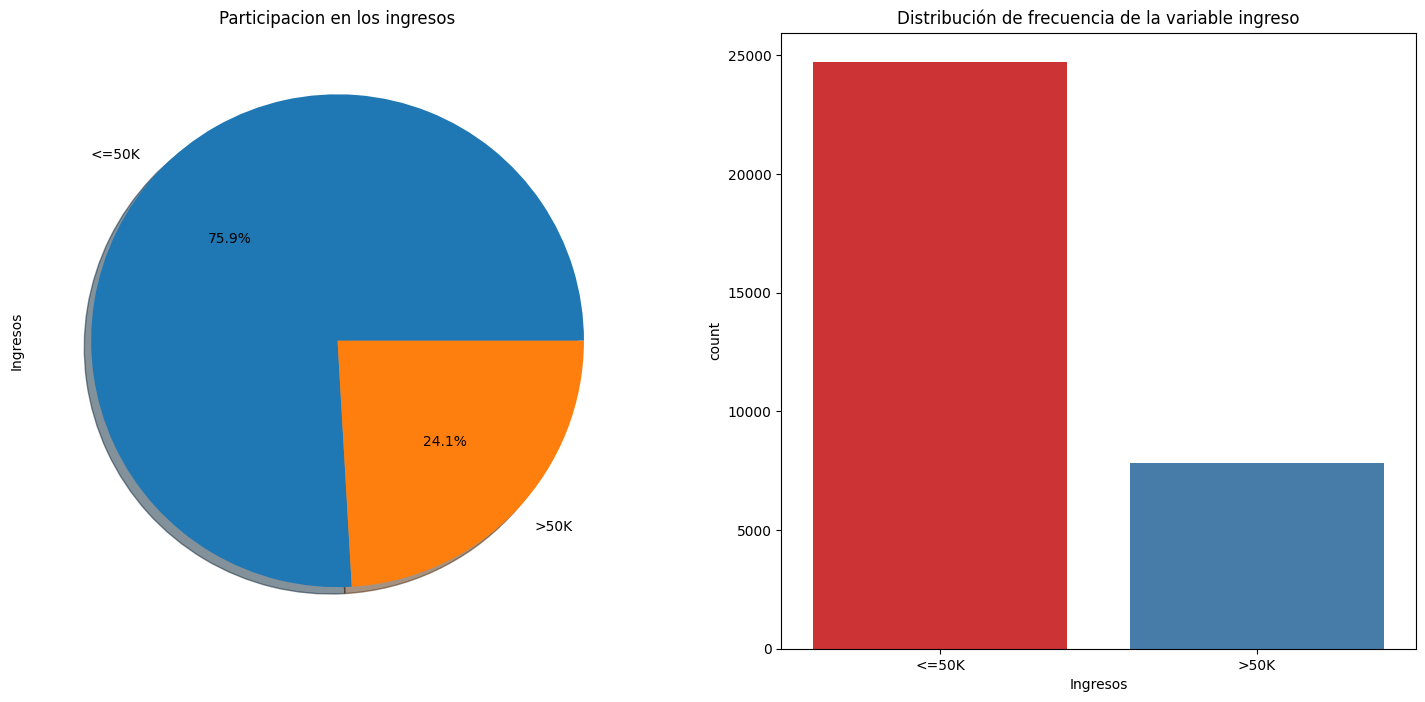

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['Ingresos'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Participacion en los ingresos')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Ingresos", data=df, palette="Set1")
ax[1].set_title("Distribución de frecuencia de la variable ingreso")

plt.show()

In [ ]:
df['Ingresos'].value_counts()/len(df)

<=50K    0.75919
>50K     0.24081
Name: Ingresos, dtype: float64

In [ ]:
more_than_50 = df[df['Ingresos'] == '>50K']
less_than_50 = df[df['Ingresos'] == '<=50K']
print (more_than_50.shape,less_than_50.shape)

(7841, 16) (24720, 16)


Como vemos los datos estan muy desequilibrados


## Generemos un grafico y relacionamos la varaible objetivo 'Ingresos' y la columna 'Sexo'

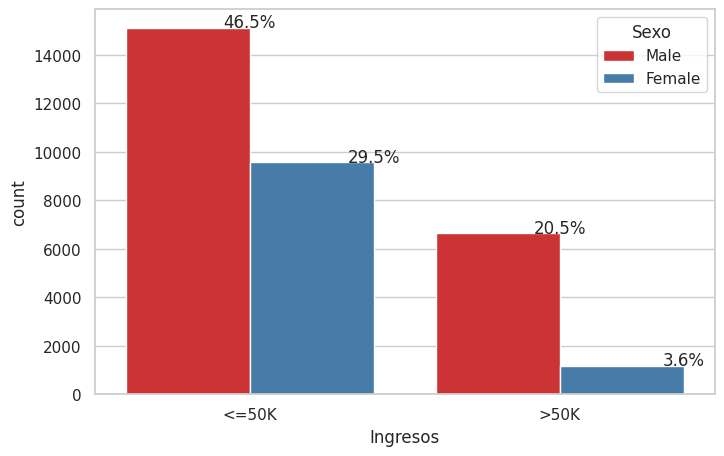

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="Ingresos", hue="Sexo", data=df,palette='Set1')
#plt.title('No. of Smokers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Los hombres parecen ganar más que las mujeres en ambas categorías de ingresos.

##Relacionamos la variable objetivo con la columna Raza

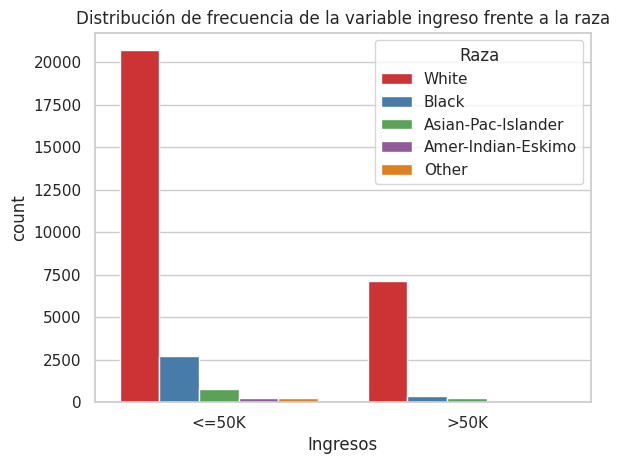

In [ ]:
#f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Ingresos", hue="Raza", data=df, palette="Set1")
ax.set_title("Distribución de frecuencia de la variable ingreso frente a la raza")
plt.show()

Los hombres parecen ganar más que las mujeres en ambas categorías de ingresos.

##Relacionamos la variable objetivo con la columna Estado Civil

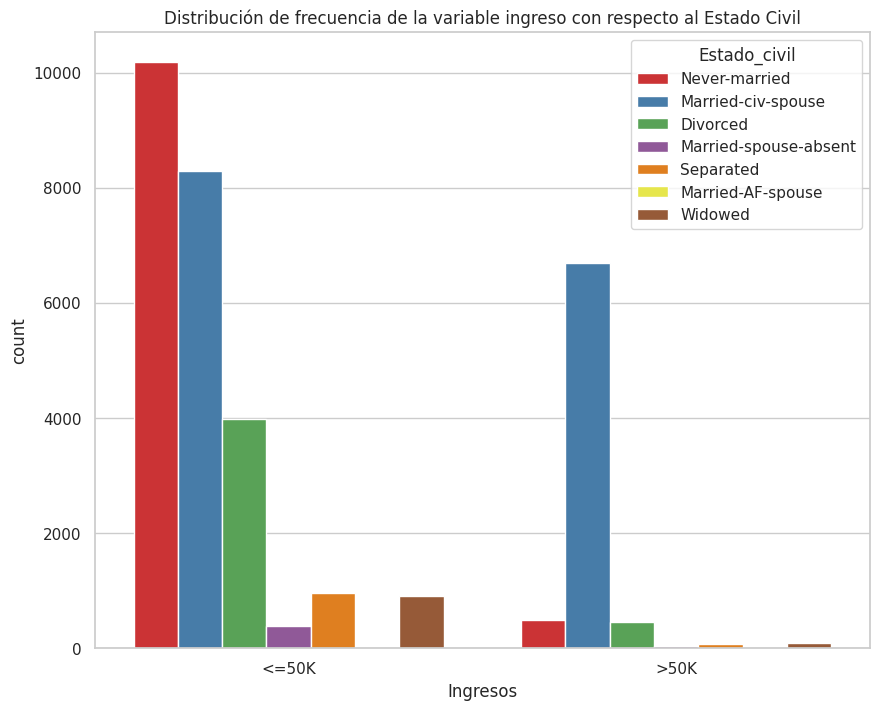

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Ingresos", hue="Estado_civil", data=df, palette="Set1")
ax.set_title("Distribución de frecuencia de la variable ingreso con respecto al Estado Civil")
plt.show()

Las personas que no están casadas ganan menos de 50.000 dólares, mientras que las personas casadas ganan más.

##Relacionamos la variable objetivo con la columna Educacion

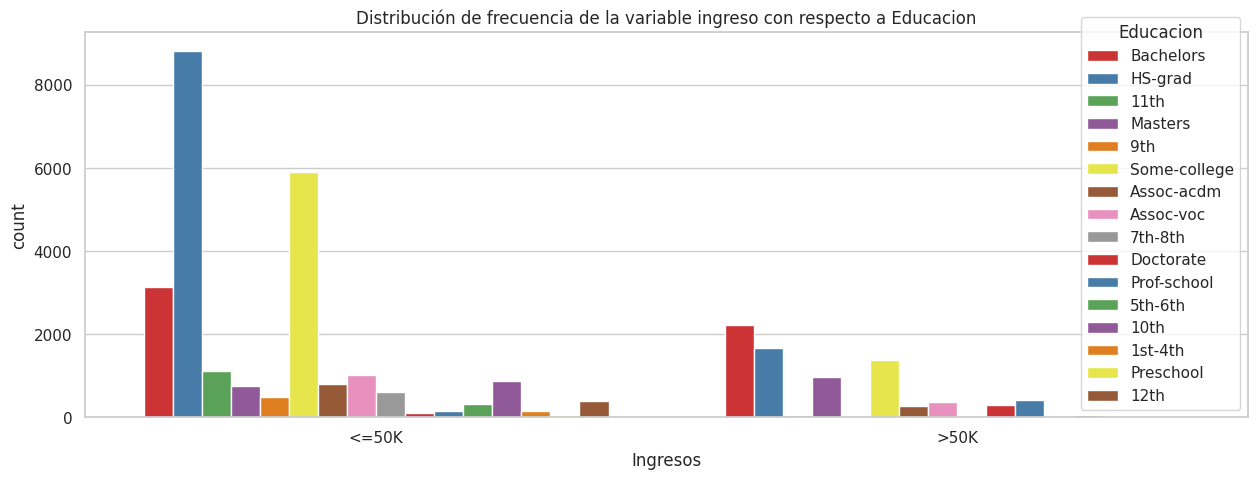

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="Ingresos", hue="Educacion", data=df, palette="Set1")
ax.set_title("Distribución de frecuencia de la variable ingreso con respecto a Educacion")
plt.show()

Vemos que las personas que han hecho maestrías ganan menos que los estudiantes que acaban de terminar la escuela secundaria, lo cual no es normal.

### Columnas Numericas

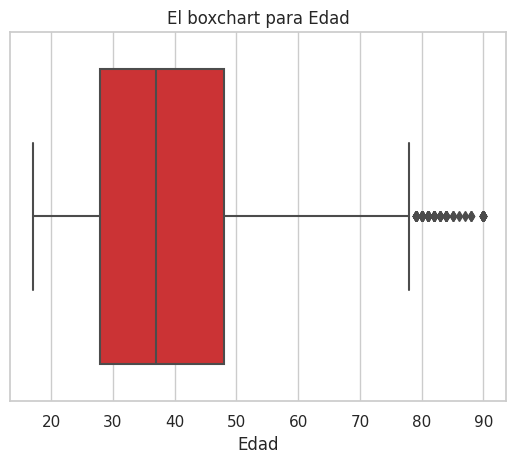

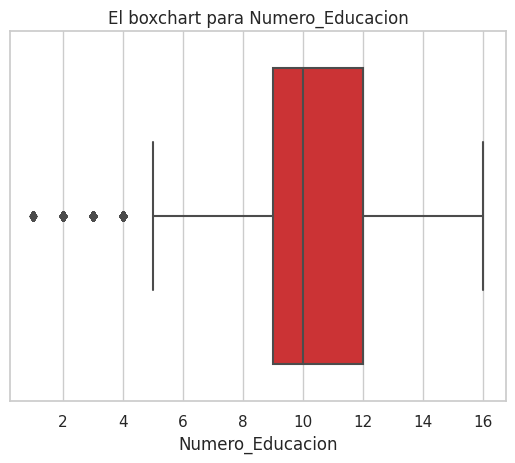

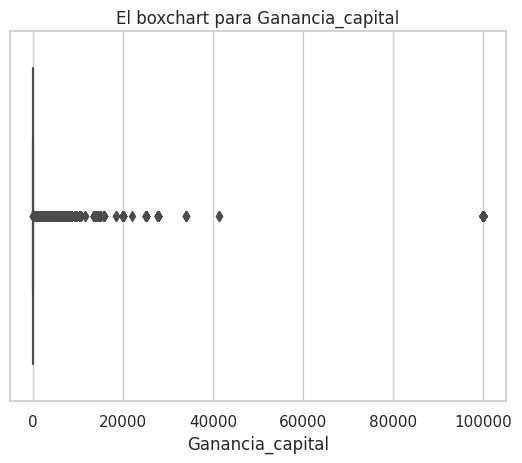

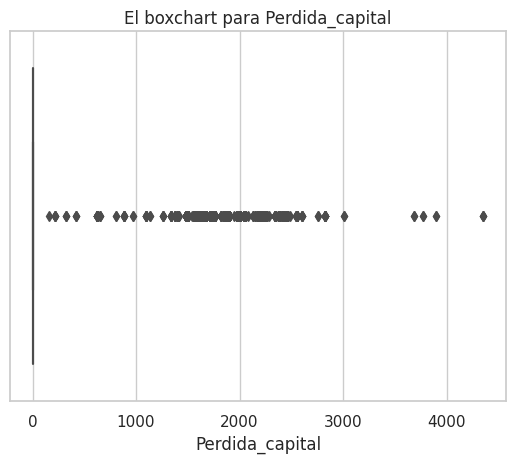

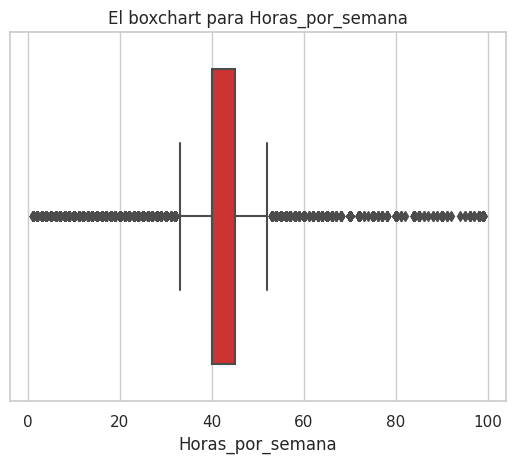

In [ ]:
#Revisemos si hay valores atípicos en las columnas numéricas
for i in numerical:
    sns.boxplot(x = df[i][1:],data=df.iloc[1:], order=df[i][1:].value_counts().index, palette='Set1')
    plt.title("El boxchart para {}".format(i))
    plt.show()


Vemos que hay pocos valores atípicos en ganancias y pérdidas de capital, veamos estos gráficos

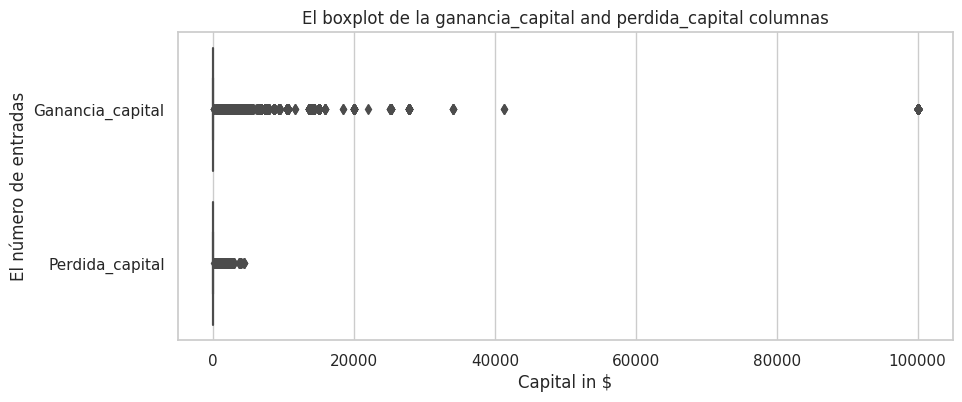

In [ ]:
plt.figure(figsize=(10,4))
plt.title('El boxplot de la ganancia_capital and perdida_capital columnas')
sns.boxplot( data=df[['Ganancia_capital','Perdida_capital']], orient='h')
plt.ylabel('El número de entradas')
plt.xlabel('Capital in $')
plt.show()

#### Eliminemos estos valores atipicos


In [ ]:
abc = df.loc[df['Ganancia_capital']>90000,'Ganancia_capital'].index
df.drop(index=abc,inplace=True)

In [ ]:
temp_3 = df.loc[df['Perdida_capital']>4000,'Perdida_capital'].index
df.drop(index=temp_3,inplace=True)

In [ ]:
numerical

['Edad',
 'Numero_Educacion',
 'Ganancia_capital',
 'Perdida_capital',
 'Horas_por_semana']

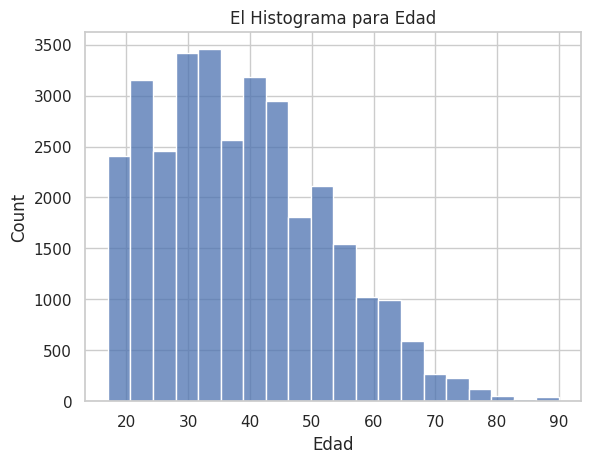

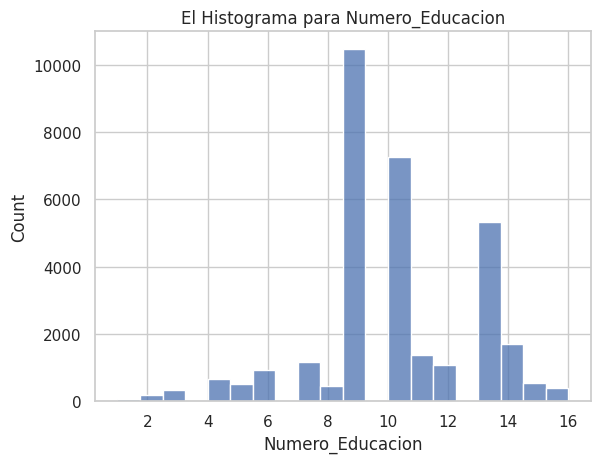

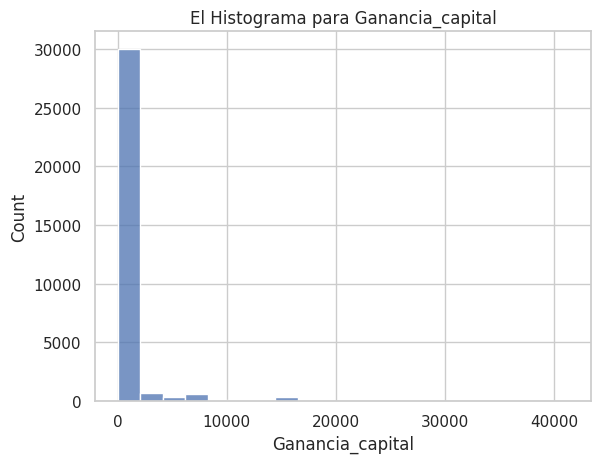

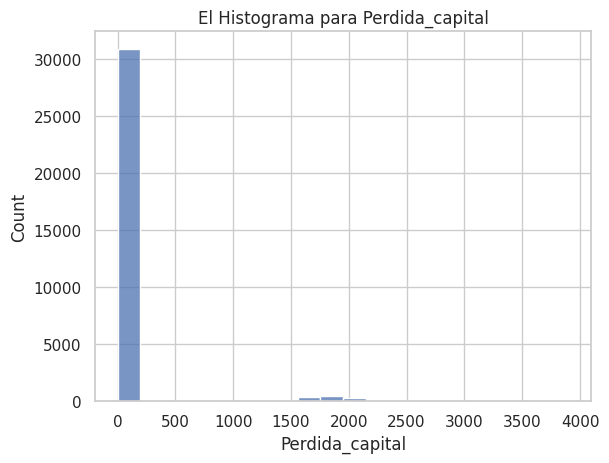

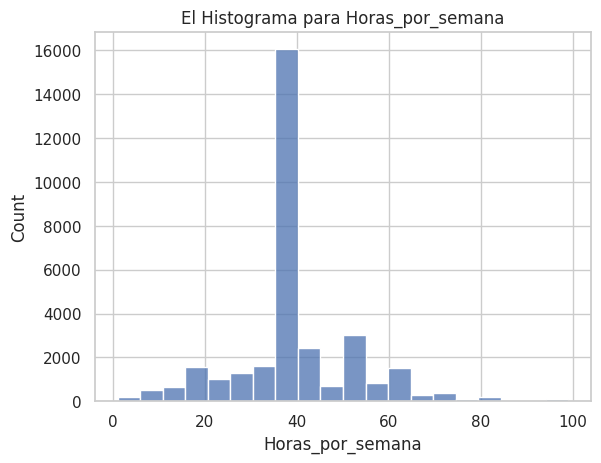

In [ ]:
for i in numerical:
    sns.histplot(x=df[i], bins=20)
    plt.title("El Histograma para {}".format(i))
    plt.show()


### Categorical Columns

In [ ]:
categorical

['Clase_Trabajo',
 'Educacion',
 'Estado_civil',
 'Ocupacion',
 'Relacion',
 'Raza',
 'Sexo',
 'Pais_origen',
 'Ingresos']

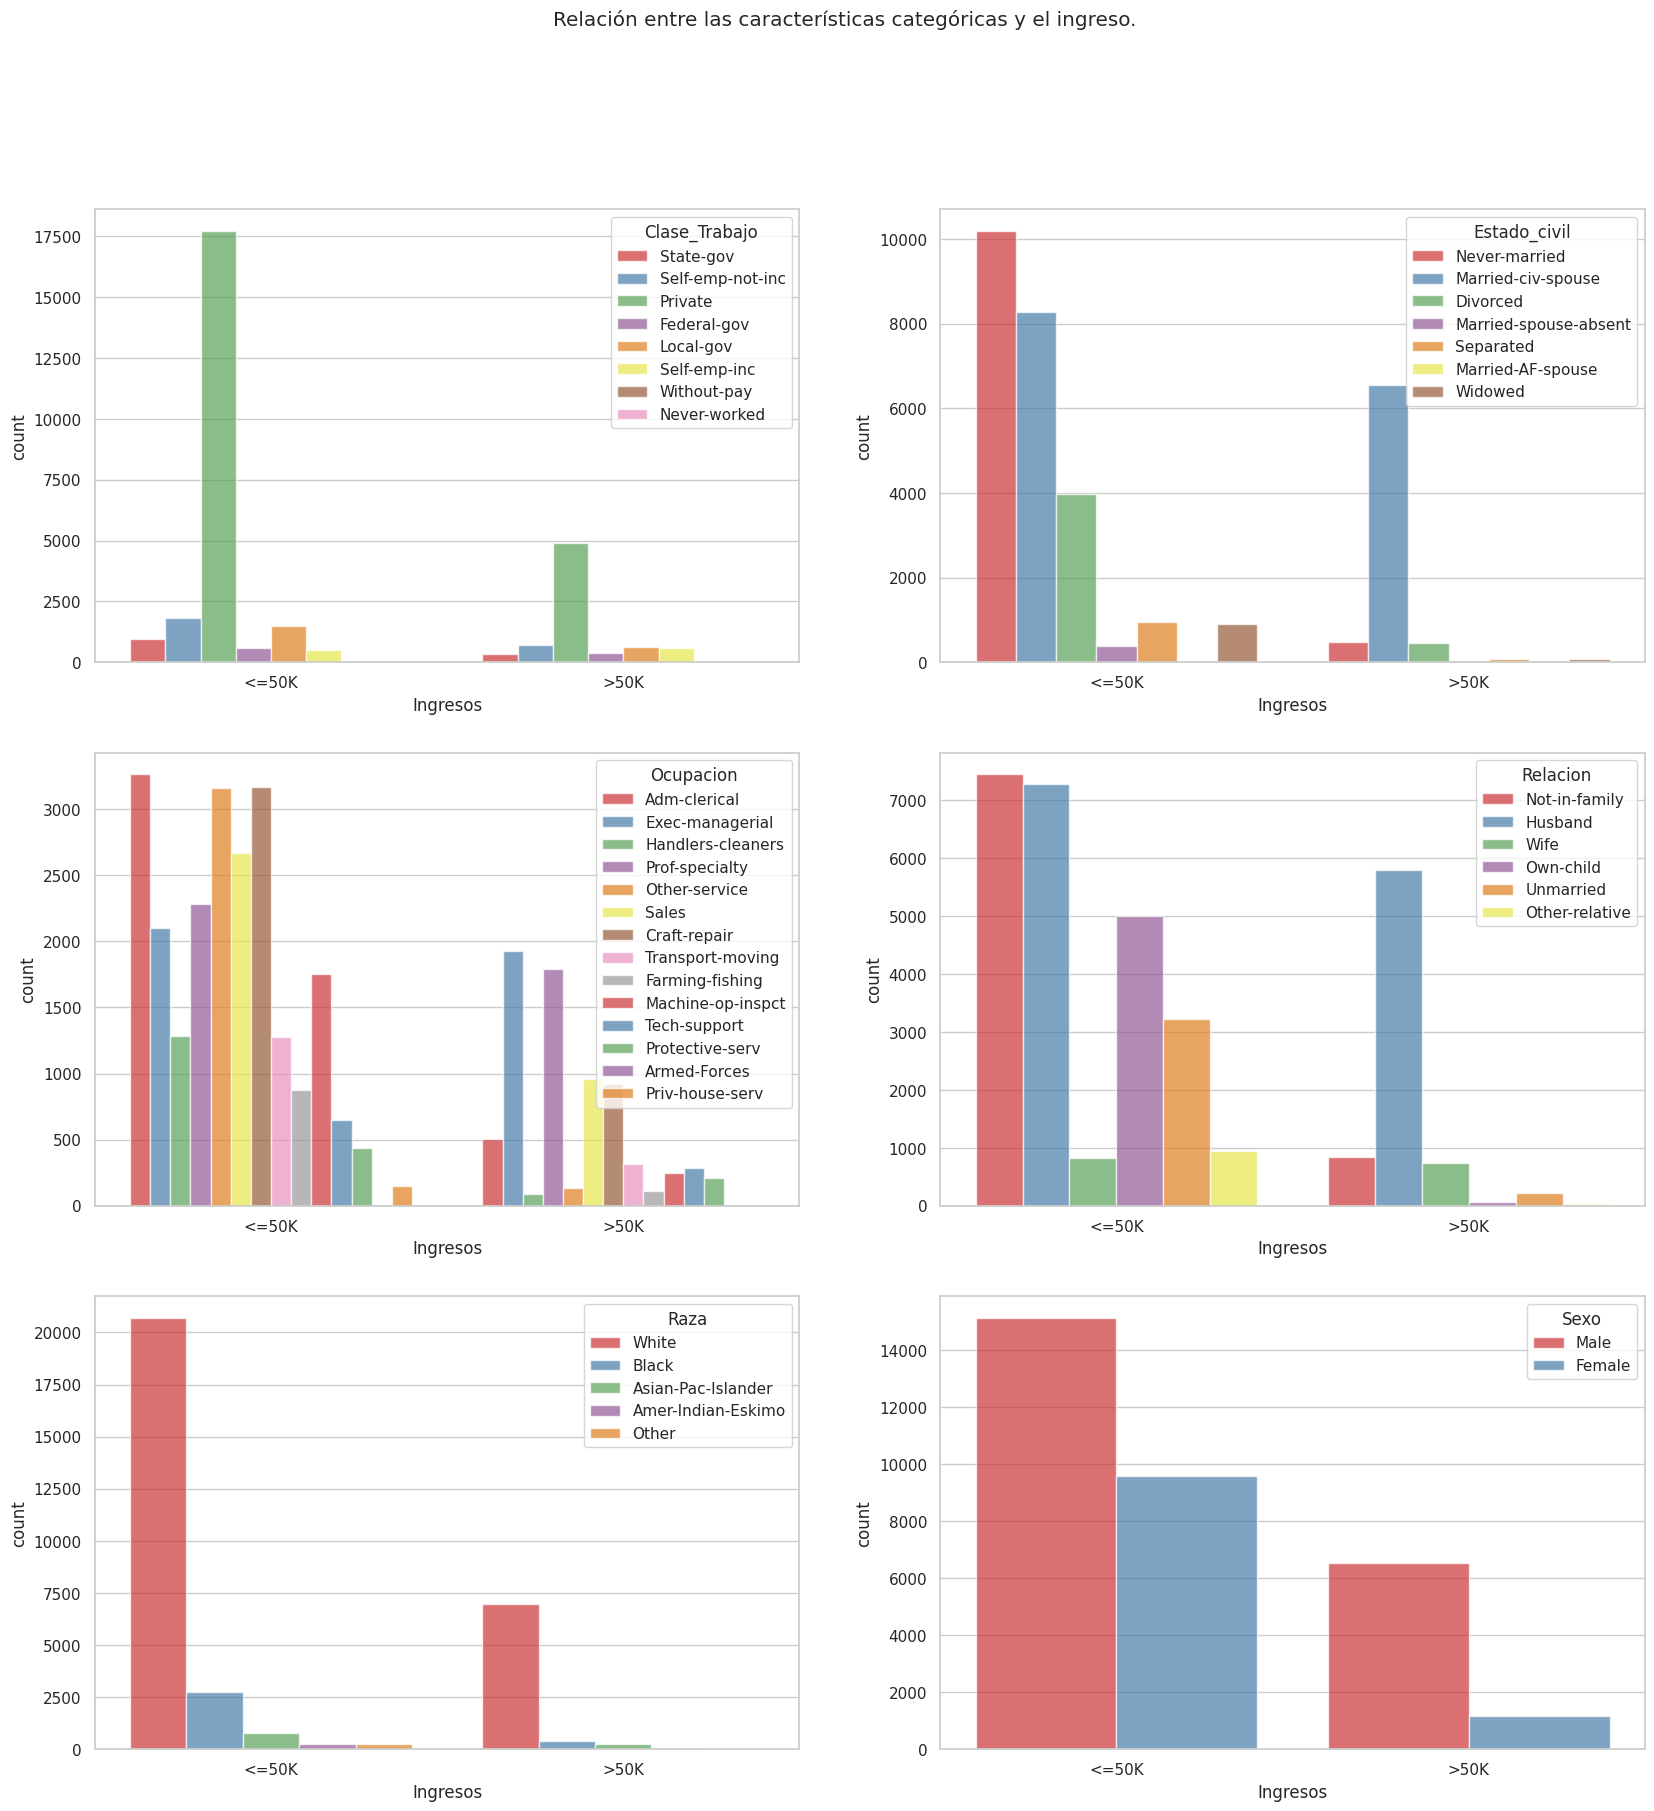

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relación entre las características categóricas y el ingreso.')

categorical2 = ['Clase_Trabajo', 'Estado_civil','Ocupacion','Relacion','Raza','Sexo',]
for ax, i in enumerate(categorical2):
    sns.countplot(x='Ingresos', alpha=0.7, hue=i, data=df, ax=axs[ax],palette='Set1')

## Matriz de correlación entre las variables numéricas

<ipython-input-42-c42498b96792>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


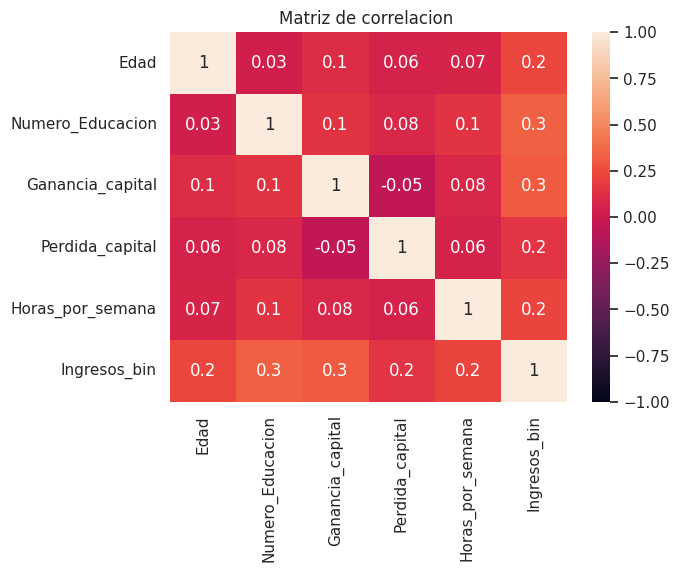

In [ ]:
corr = df.corr()
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Matriz de correlacion ')
plt.show()

 Dividimos el Dataframe en dos conjuntos.

 Preparamos datos para el entrenamiento de modelos de aprendizaje automático. X se refiere a las variables independientes, mientras que Y se refiere a la variable dependiente o objetivo que estás tratando de predecir.

In [ ]:
X = df.drop(columns='Ingresos')
y = df['Ingresos']

# Label Encoding

Esta función nos sera útil para convertir variables categóricas del DataFrame a un formato numérico, lo que es necesario para trabajar con modelos de aprendizaje automático.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

In [ ]:
df.columns

Index(['Edad', 'Clase_Trabajo', 'Educacion', 'Numero_Educacion',
       'Estado_civil', 'Ocupacion', 'Relacion', 'Raza', 'Sexo',
       'Ganancia_capital', 'Perdida_capital', 'Horas_por_semana',
       'Pais_origen', 'Ingresos', 'Grupo_edad', 'Ingresos_bin'],
      dtype='object')

In [ ]:
label_list = ['Clase_Trabajo', 'Educacion','Estado_civil',
       'Ocupacion', 'Relacion', 'Raza', 'Sexo','Pais_origen', 'Ingresos']
for i in label_list:
    label_encoder(i)

In [ ]:
df.head()

,Edad,Clase_Trabajo,Educacion,Numero_Educacion,Estado_civil,Ocupacion,Relacion,Raza,Sexo,Ganancia_capital,Perdida_capital,Horas_por_semana,Pais_origen,Ingresos,Grupo_edad,Ingresos_bin
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


#  Normalizando las variables


La normalización o escalado de las características es importante para muchos algoritmos de aprendizaje automático, ya que asegura que todas las características tengan la misma escala, evitando así que ciertas características dominen sobre otras.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df.head()

,Edad,Clase_Trabajo,Educacion,Numero_Educacion,Estado_civil,Ocupacion,Relacion,Raza,Sexo,Ganancia_capital,Perdida_capital,Horas_por_semana,Pais_origen,Ingresos,Grupo_edad,Ingresos_bin
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [ ]:
scaler.fit(df.drop(['Ingresos','Grupo_edad','Ingresos_bin'],axis=1))

MinMaxScaler()

In [ ]:
scaled_features = scaler.transform(df.drop(['Ingresos','Grupo_edad','Ingresos_bin'],axis=1))

La variable scaled_features ahora contiene las características escaladas que usaremos para entrenar o evaluar un modelo de aprendizaje automático.

In [ ]:
df.columns

Index(['Edad', 'Clase_Trabajo', 'Educacion', 'Numero_Educacion',
       'Estado_civil', 'Ocupacion', 'Relacion', 'Raza', 'Sexo',
       'Ganancia_capital', 'Perdida_capital', 'Horas_por_semana',
       'Pais_origen', 'Ingresos', 'Grupo_edad', 'Ingresos_bin'],
      dtype='object')

In [ ]:
columns=['Edad', 'Clase_Trabajo', 'Educacion', 'Numero_Educacion', 'Estado_civil',
       'Ocupacion', 'Relacion', 'Raza', 'Sexo', 'Ganancia_capital',
       'Perdida_capital', 'Horas_por_semana', 'Pais_origen']

In [ ]:
df_scaled = pd.DataFrame(scaled_features,columns=columns)
df_scaled.head()

,Edad,Clase_Trabajo,Educacion,Numero_Educacion,Estado_civil,Ocupacion,Relacion,Raza,Sexo,Ganancia_capital,Perdida_capital,Horas_por_semana,Pais_origen
0,0.301370,0.750,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.052626,0.0,0.397959,0.926829
1,0.452055,0.625,0.600000,0.800000,0.333333,0.214286,0.0,1.0,1.0,0.000000,0.0,0.122449,0.926829
2,0.287671,0.375,0.733333,0.533333,0.000000,0.357143,0.2,1.0,1.0,0.000000,0.0,0.397959,0.926829
3,0.493151,0.375,0.066667,0.400000,0.333333,0.357143,0.0,0.5,1.0,0.000000,0.0,0.397959,0.926829
4,0.150685,0.375,0.600000,0.800000,0.333333,0.642857,1.0,0.5,0.0,0.000000,0.0,0.397959,0.097561


Estos números son las representaciones escaladas de las características originales.
El objetivo del escalado es normalizar las características para que puedan ser tratadas de manera más uniforme para algoritmos de aprendizaje .

# Manejo de conjuntos de datos desequilibrados

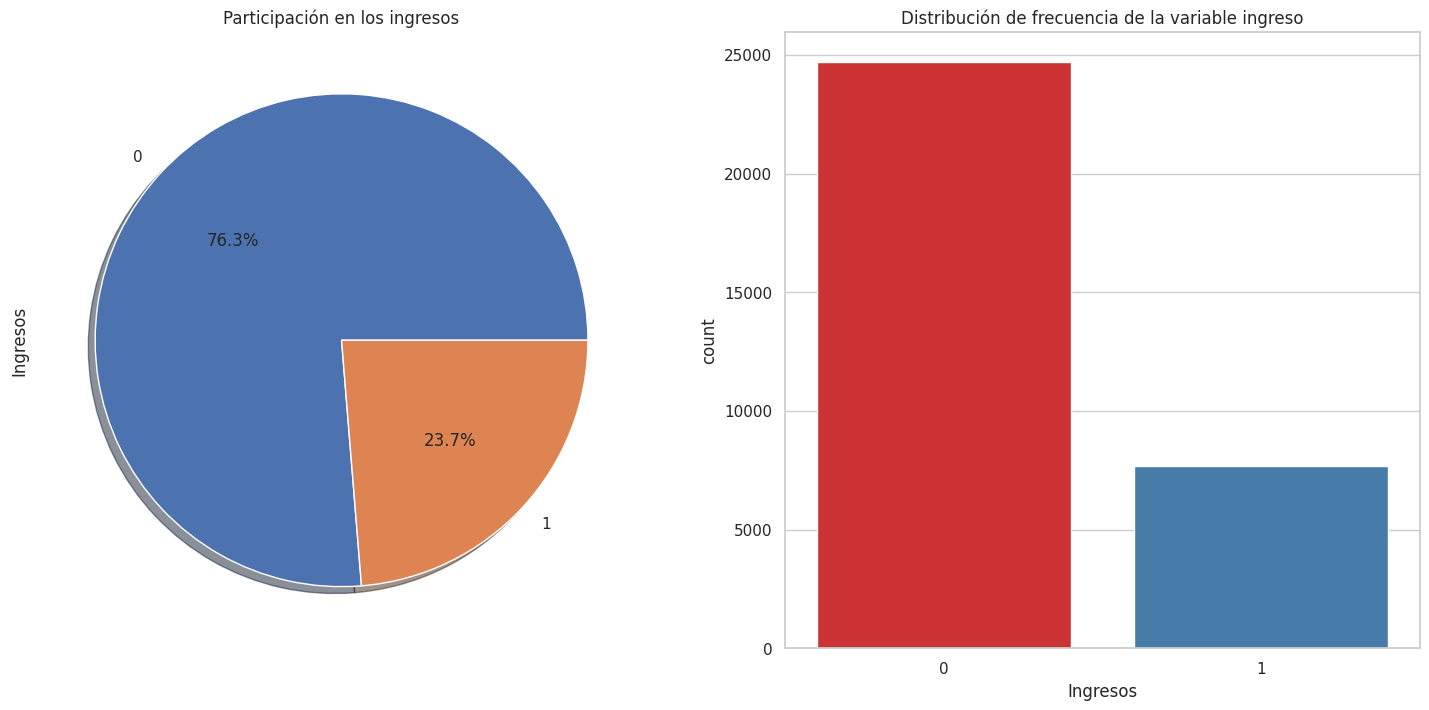

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['Ingresos'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Participación en los ingresos')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Ingresos", data=df, palette="Set1")
ax[1].set_title("Distribución de frecuencia de la variable ingreso")

plt.show()

### Uso del método de sobremuestreo para manejar un conjunto de datos desequilibrado

In [ ]:
df.head()

,Edad,Clase_Trabajo,Educacion,Numero_Educacion,Estado_civil,Ocupacion,Relacion,Raza,Sexo,Ganancia_capital,Perdida_capital,Horas_por_semana,Pais_origen,Ingresos,Grupo_edad,Ingresos_bin
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
X = df_scaled
y= df.Ingresos

Implementamos una técnica de sobremuestreo combinada llamada SMOTE-Tomek.
Esta técnica es especialmente útil cuando tienes un desequilibrio significativo entre las clases y optimiza para mejorar el rendimiento de un modelo de aprendizaje.

In [ ]:
# Implementación de sobremuestreo para manejar desequilibrios
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape

((48174, 13), (48174,))

In [ ]:
from collections import Counter
print('Forma del conjunto de datos original {}'.format(Counter(y)))
print('Forma del conjunto de datos remuestreado {}'.format(Counter(y_res)))

Forma del conjunto de datos original Counter({0: 24717, 1: 7682})
Forma del conjunto de datos remuestreado Counter({0: 24087, 1: 24087})


# Train_test_split

L función train_test_split se usa para dividir el conjunto de datos remuestreado (X_res e y_res) en conjuntos de entrenamiento (X_train e y_train) y prueba (X_test e y_test).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=101,shuffle=True)

In [ ]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (38539, 13)
X_test shape: (9635, 13)
y_train shape: (38539,)
y_test shape: (9635,)


In [ ]:
# Para almacenar resultados de modelos.
result_dict_train = {}
result_dict_test = {}

Dividir el conjunto de datos en conjuntos de entrenamiento y prueba es una práctica esencial para evaluar y mejorar modelos de aprendizaje automático. Sin esta división, no se podria medir adecuadamente la capacidad del modelo para generalizar a datos no vistos..

# Algoritmos de Aprendizaje


## Gradient Boosting

Es una técnica de ensamblado que combina la predicción de múltiples modelos más simples para construir un modelo más robusto y preciso

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

Train Score: 0.8668880533665908
Test Score: 0.8679813181110535


In [ ]:
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)

In [ ]:
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.8969096837344903
Test Score: 0.9025428126621692


In [ ]:
result_dict_train["Gradient-Boost GridSearch Train Score"] = gb_cv.best_score_
result_dict_test["Gradient-Boost GridSearch Test Score"] = gb_cv.score(X_test,y_test)

# SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.833908474823466
Test Score: 0.8330046704722366


In [ ]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

In [ ]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ()
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
accuracies = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",classifier.score(X_test,y_test))

In [ ]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = classifier.score(X_test,y_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=5000)
accuracies = cross_val_score(lr_model, X_train, y_train, cv=5)
lr_model.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",lr_model.score(X_test,y_test))

Train Score: 0.7778211340191777
Test Score: 0.7750674693792817


In [ ]:
result_dict_train["Logistic regression Default Train Score"] = np.mean(accuracies)
result_dict_test["Logistic regression Default Test Score"] = lr_model.score(X_test,y_test)

In [ ]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter=4000)

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(X_train, y_train)

print("Best Parameters:",logreg_cv.best_params_)
print("Train Score:",logreg_cv.best_score_)
print("Test Score:",logreg_cv.score(X_test,y_test))

Best Parameters: {'C': 3.727593720314938}
Train Score: 0.7789997411405306
Test Score: 0.776782035434693


In [ ]:
result_dict_train["Logistic Regression GridSearch Train Score"] = logreg_cv.best_score_
result_dict_test["Logistic Regression GridSearch Test Score"] = logreg_cv.score(X_test,y_test)

El modelo de Gradient Boosting Classifier ha
demostrado ser el más efectivo en términos de
precisión en el conjunto de prueba (0.9025). Este modelo es recomendado si la máxima precisión es el principal criterio de evaluación.